In [3]:
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

iris = fetch_ucirepo(id=53) 
  
X = iris.data.features 
y = iris.data.targets 

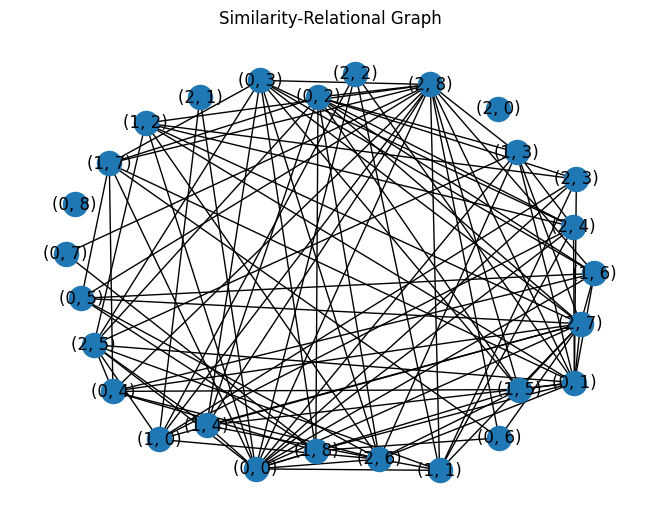

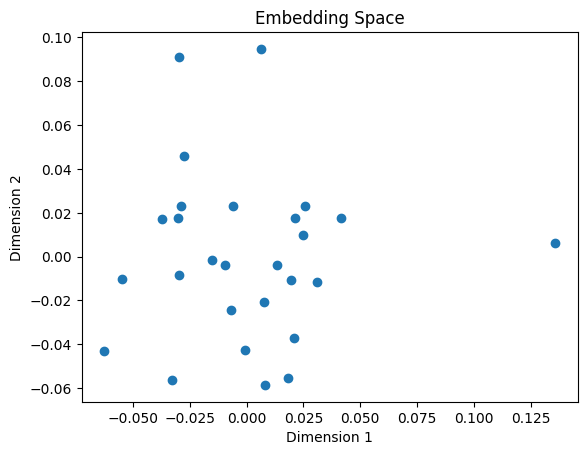

Embedding Matrix:
 [[ 0.01815023 -0.05515006]
 [ 0.00757813 -0.02058035]
 [-0.0006649  -0.04240621]
 [-0.00712545 -0.02422372]
 [-0.00975033 -0.0040129 ]
 [-0.02998017 -0.00829642]
 [ 0.03084325 -0.01157699]
 [-0.01527194 -0.00161142]
 [-0.02781066  0.04594929]
 [-0.03292635 -0.05614706]
 [ 0.00626298  0.09475698]
 [ 0.13576427  0.00631241]
 [-0.03712657  0.01738605]
 [ 0.02548727  0.02302826]
 [-0.05499264 -0.01020353]
 [ 0.04161742  0.01744845]
 [ 0.0133525  -0.00396609]
 [-0.00624039  0.02313921]
 [-0.02887765  0.02306973]
 [-0.03042179  0.01768012]
 [ 0.02117377  0.01772297]
 [-0.02959197  0.09110766]
 [-0.06273352 -0.04288524]
 [ 0.00810015 -0.05851344]
 [ 0.019589   -0.01075038]
 [ 0.0246913   0.00986562]
 [ 0.02090404 -0.03714296]]


In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def construct_similarity_graph(X):

    G = nx.Graph()
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    similarity_matrix = cosine_similarity(X_encoded)
    
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embedding(X, embedding_dim=2):

    G = construct_similarity_graph(X)
    nx.draw(G, with_labels=True)
    plt.title('Similarity-Relational Graph')
    plt.show()
    spectral_embedding = SpectralEmbedding(n_components=embedding_dim)
    embedding_matrix = spectral_embedding.fit_transform(nx.adjacency_matrix(G))

    plt.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1])
    plt.title('Embedding Space')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embedding_matrix

# Perform graph embedding
embedding_matrix = graph_embedding(X)
print("Embedding Matrix:\n", embedding_matrix)

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
import pandas as pd
from sklearn.impute import SimpleImputer

# Data 
X = soybean_large.data.features 
y = soybean_large.data.targets 

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Function to perform clustering and calculate performance indices
def evaluate_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true))).fit(X)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    
    return ari, nmi, fmi

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Perform clustering and evaluate with different methods
ari_kmeans, nmi_kmeans, fmi_kmeans = evaluate_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y, method='hierarchical')

# Print the results
print("KMeans:")
print("Adjusted Rand Index (ARI):", ari_kmeans)
print("Normalized Mutual Information (NMI):", nmi_kmeans)
print("Folkes-Mallows Index (FMI):", fmi_kmeans)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)

KMeans:
Adjusted Rand Index (ARI): 0.4110923731892059
Normalized Mutual Information (NMI): 0.6958123021679478
Folkes-Mallows Index (FMI): 0.4584656786838135

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941


<b>Adjusted Rand Index (ARI):</b>
    The Adjusted Rand Index (ARI) is a measure that quantifies the similarity between two clustering results, considering all pairs of samples and their memberships in the clusters. It adjusts for chance, providing a baseline for random clustering by comparing the expected similarity of randomly clustered data with the actual clustering. ARI measures the similarity between two clustering results, considering all pairs of samples and their memberships in the clusters. It adjusts for chance, providing a baseline for random clustering by comparing the expected similarity of randomly clustered data with the actual clustering.   

<br>
<i><u>Advantages:</i></u>

- ARI measures the similarity between two clustering results, considering all pairs of samples and their memberships in the clusters.
- It adjusts for chance, meaning it provides a baseline for random clustering by comparing the expected similarity of randomly clustered data with the actual clustering.
- ARI ranges from -1 to 1, where 1 indicates perfect similarity between two clusterings.

<u><i>Disadvantages:</i></u>
- ARI does not consider the true labels of the data directly, which means it can sometimes be sensitive to the number of clusters and their sizes.
- It is not normalized and can take negative values, making interpretation challenging.

<u><i>When to use:</i></u>
- ARI is useful when you have ground truth labels available and want to evaluate the similarity between the predicted clusters and the true labels.
- It is commonly used for evaluating clustering algorithms in scenarios where the ground truth is available.
<br>

<hr>
<b>Normalized Mutual Information (NMI):</b> measures the mutual dependence between the true labels and the predicted clusters, adjusting for chance. It provides a normalized measure of agreement between two clustering results, always falling between 0 and 1, with 1 indicating perfect agreement. NMI measures the mutual dependence between the true labels and the predicted clusters, adjusting for chance. It provides a normalized measure of agreement between two clustering results, always falling between 0 and 1, with 1 indicating perfect agreement.

<i><u>Advantages:</i></u>
- NMI measures the mutual dependence between the true labels and the predicted clusters, adjusting for chance.
- It is normalized, meaning it always falls between 0 and 1, with 1 indicating perfect agreement between the clustering and the true labels.
- NMI is symmetric, meaning it does not depend on the order of the true labels or the predicted clusters.

<u><i>Disadvantages:</i></u>
- NMI can be biased towards clusters with more homogeneous sizes, as it does not penalize for over-fragmentation or under-fragmentation.

<u><i>When to use:</i></u>
- NMI is suitable when you want to evaluate the overall agreement between the true labels and the predicted clusters, irrespective of the number of clusters or their sizes.
It is commonly used in situations where the ground truth is available but the number of clusters may vary.
<br>
<hr>
<b>Folkes-Mallows Index (FMI):</b> measures the geometric mean of precision and recall of the clustering with respect to the true classes. It provides a balanced evaluation of both precision and recall, taking into account both false positives and false negatives. FMI measures the geometric mean of precision and recall of the clustering with respect to the true classes. It provides a balanced evaluation of both precision and recall, taking into account both false positives and false negatives.

<i><u>Advantages:</i></u>
- FMI measures the geometric mean of precision and recall of the clustering with respect to the true classes.
- It provides a balanced evaluation of both precision and recall, taking into account both false positives and false negatives.

<u><i>Disadvantages:</i></u>
- FMI may not be as widely used or as well-known as ARI or NMI.

<u><i>When to use:</i></u>
- FMI is useful when you want a balanced evaluation of both precision and recall in clustering.
- It is particularly relevant when false positives and false negatives have different implications or costs in your application domain.